In [1]:
import mido
import sounddevice as sd
import numpy as np
import math
import matplotlib.pyplot as plt

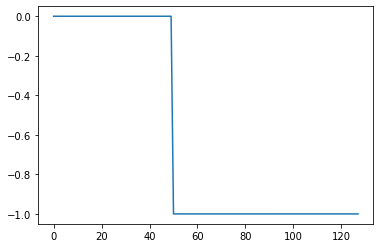

In [2]:
def sawtooth(duration, frequency, sampling_rate, starting_y=0):
    # Calculate the number of samples
    num_samples = int(duration * sampling_rate)

    # Calculate the time values for each sample
    time = np.linspace(0, duration, num_samples, endpoint=False)

    # Calculate the period
    period = sampling_rate/frequency

    first_period = period*(1-starting_y)//2
    single_line = 2/period*time[int(period)//2:3*int(period)//2]
    sawtooth = 2/period*time[:int(first_period)]+starting_y
    while len(sawtooth) + period < num_samples:
        sawtooth = np.append(sawtooth, single_line)
    final_part = 2/period*time[:num_samples-len(sawtooth)]-1
    sawtooth = np.append(sawtooth, final_part)

    return sawtooth

buffer_size=128
sampling_rate = 44100
plt.plot(sawtooth(buffer_size/sampling_rate, 440, sampling_rate))

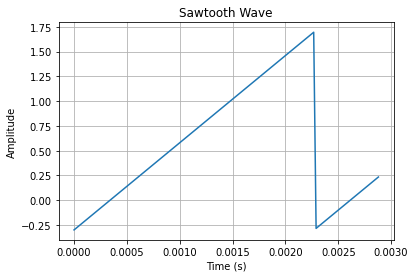

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sawtooth_wave(start_y, duration, frequency):
    # Generate time values
    sample_rate = 44100  # Adjust this value to change the resolution
    t = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    
    # Calculate the sawtooth wave
    period = 1.0 / frequency
    y = ((t / period) % 1) * 2 - 1 + start_y
    
    return t, y

# Example usage
start_y = 0.7   # Starting y position (adjust as desired)
duration = 1.0  # Duration of the wave in seconds
frequency = 440 # Frequency of the wave in Hz

t, y = generate_sawtooth_wave(start_y, duration, frequency)

# Plotting the wave
plt.plot(t[:128], y[:128])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sawtooth Wave')
plt.grid(True)
plt.show()

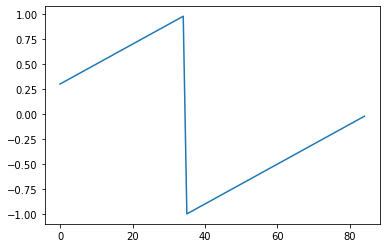

In [4]:
def starting_saw(starting_y, sampling_rate, frequency):
    period = sampling_rate/frequency
    num_samples = int(period*(1-starting_y)/2)
    time = np.linspace(0, num_samples, num_samples, endpoint=False)
    return (2/period)*time+starting_y

def complete_first_saw(sampling_rate, frequency):
    period = sampling_rate/frequency
    num_samples = int(period/2)
    time = np.linspace(0, num_samples, num_samples, endpoint=False)
    return (2/period)*time-1
    
plt.plot(np.append(starting_saw(0.3, 44100, 440), complete_first_saw(44100, 440)))
plt.show()

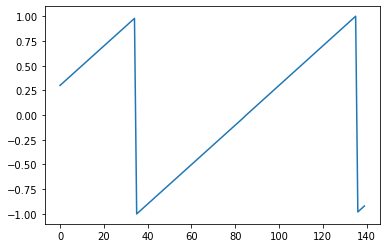

In [5]:
def generate_sawtooth_wave(duration, frequency, sampling_rate, phase_shift=0):
    # Calculate the number of samples
    num_samples = int(duration * sampling_rate)
    
    # Calculate the time values for each sample
    time = np.linspace(0, duration, num_samples, endpoint=False)
    
    # Calculate the angular frequency
    angular_frequency = 2 * np.pi * frequency
    
    # Generate the sawtooth wave
    sawtooth_wave = (2 / np.pi) * np.arctan(np.tan(0.5 * angular_frequency * time + phase_shift))
    
    return np.round(sawtooth_wave, 2)

def sawtooth(duration, frequency, sampling_rate, starting_y):
    # Calculate the number of samples
    num_samples = int(duration * sampling_rate)
    
    # Compute first saw
    start = starting_saw(starting_y, sampling_rate, frequency)
    complete = complete_first_saw(sampling_rate, frequency)
    
    # Finish the wave
    len_left = num_samples - len(start) - len(complete)
    finish = generate_sawtooth_wave(len_left/sampling_rate, frequency, sampling_rate)
    
    return np.append(np.append(start, complete), finish)

buffer_size = 512
sampling_rate = 44100
plt.plot(sawtooth(buffer_size/sampling_rate, 440, sampling_rate, 0.3)[:140])
plt.show()

In [7]:
snd = sawtooth(2, 440, sampling_rate, 0.3)

# Make a sound player function that plays array "x" with a sample rate "rate", and labels it with "label"
def sound( x, rate=8000, label=''):
    from IPython.display import display, Audio, HTML
    display( HTML( 
    '<style> table, th, td {border: 0px; }</style> <table><tr><td>' + label + 
    '</td><td>' + Audio( x, rate=rate)._repr_html_()[3:] + '</td></tr></table>'
    ))
    
sound(snd, rate=sampling_rate)

""


In [9]:
conc_saw = []
last_val = 0
for i in range(1000):
    app = sawtooth(buffer_size/sampling_rate, 220, sampling_rate, last_val)
    last_val = app[-1]
    conc_saw = np.append(conc_saw, app)
    
sound(conc_saw, rate=sampling_rate)

""


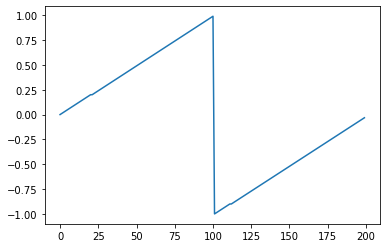

In [10]:
plt.plot(conc_saw[400:600])